<a href="https://colab.research.google.com/github/Li-Hongmin/ideas/blob/main/FindTwoModelsFromToyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

# Create artificial dataset 

a toy data: half circle

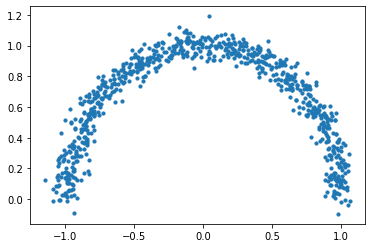

In [52]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
topMoon_idx = y==0
X = X[topMoon_idx,:]
# plt.scatter(X[:, 0], X[:, 1], s=10)
X, y = X[:,0], X[:,1]
plt.scatter(X, y, s=10)

a toy data: X

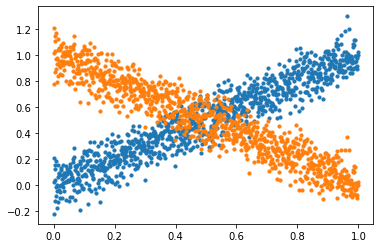

In [56]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
X1, y1 = np.arange(0,1,0.001),np.arange(0,1,0.001)+s
X2, y2 = np.arange(0,1,0.001),np.arange(1,0,-0.001)+s
plt.scatter(X1, y1, s=10)
plt.scatter(X2, y2, s=10)
plt.show()
X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))

# Use one regression model to fit all samples 

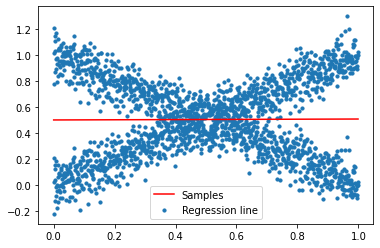

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
reg = LinearRegression()
X, y = X.reshape(-1, 1), y.reshape(-1, 1)
y_score = reg.fit(X, y).predict(X)

plt.scatter(X, y, s=10)
plt.plot(X, y_score, color='r')
plt.legend(['Samples','Regression line'])
plt.show()

# Use two regression models to all sample

Inintial two subsets

Text(0.5, 1.0, 'R2 score: 0.004480784683114081')

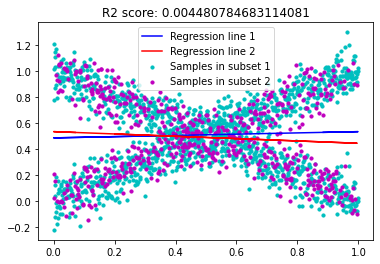

In [63]:
# random subset 
from sklearn.model_selection import train_test_split
# test size is 0.3 to keep the imbalance between two subsets
X1, X2, y1, y2 = train_test_split(
     X, y, test_size=0.3, random_state=22)

# kmeans based subset

# from sklearn.cluster import KMeans
# import numpy as np
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# idx0 = kmeans.labels_ == 0
# idx1 = kmeans.labels_ == 1
# X1, X2, y1, y2 = X[idx0], X[idx1], y[idx0], y[idx1]


from sklearn.metrics import r2_score
def reg_fit(X,y, ax, cpoint, cline):
    reg = LinearRegression()
    y_score = reg.fit(X, y).predict(X)

    ax.scatter(X, y, s=10, color =cpoint)
    ax.plot(X, y_score, color=cline)

    return reg, y_score


fig, ax = plt.subplots()

reg1, yfit1 = reg_fit(X1,y1,ax, 'c', 'b')
reg2, yfit2 = reg_fit(X2,y2,ax, 'm', 'r')

ax.legend(['Regression line 1', 'Regression line 2',
           'Samples in subset 1','Samples in subset 2'])

y_pred = np.concatenate((yfit1, yfit2))
y_ture = np.concatenate((y1, y2))
R2 = r2_score(y_ture, y_pred)
msg = "R2 score: {}".format(R2)
ax.set_title(msg)

Optimization Iteration

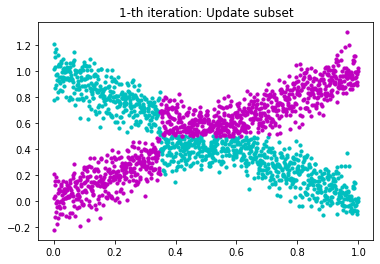

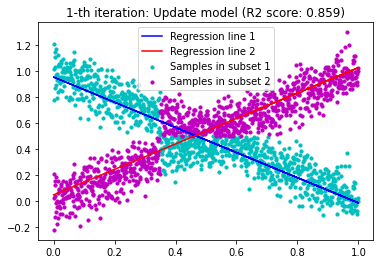

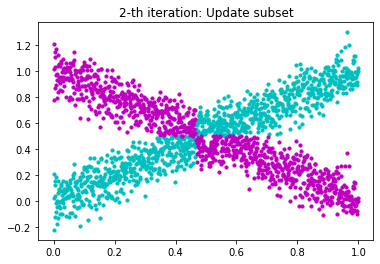

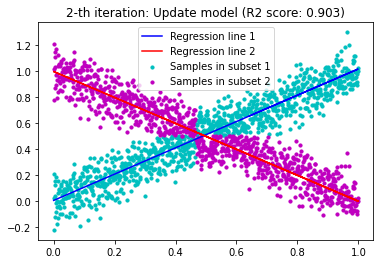

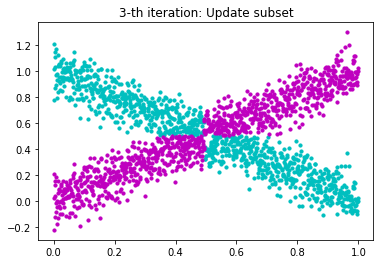

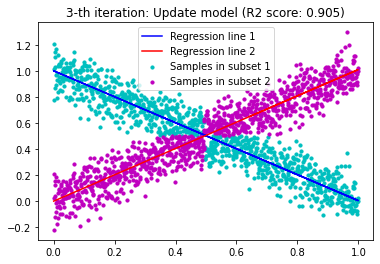

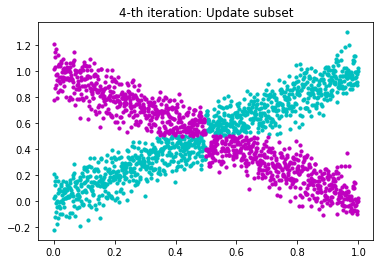

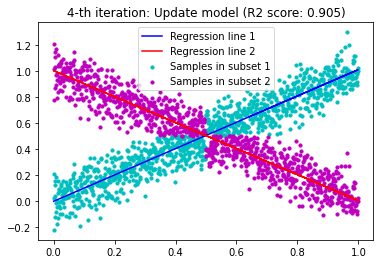

In [64]:
oldR2 = 0
i= 0
while R2> oldR2:
    i += 1
    oldR2 = R2
    # Find better sample for two model
    residual1 = abs(reg1.predict(X) - y)
    residual2 = abs(reg2.predict(X) - y)
    idx0 = residual1 > residual2
    idx1 = residual1 <= residual2
    X1, X2, y1, y2 = X[idx0].reshape(-1,1), X[idx1].reshape(-1,1), y[idx0].reshape(-1,1), y[idx1].reshape(-1,1)

    plt.scatter(X1, y1, s=10, c ='c')
    plt.scatter(X2, y2, s=10, c = 'm')
    plt.title('{}-th iteration: Update subset'.format(i))
    plt.show()
    # Find better model for two subets
    fig, ax = plt.subplots()
    reg1, yfit1 = reg_fit(X1,y1,ax, 'c', 'b')
    reg2, yfit2 = reg_fit(X2,y2,ax, 'm', 'r')
    y_pred = np.concatenate((yfit1, yfit2))
    y_ture = np.concatenate((y1, y2))
    R2 = round(r2_score(y_ture, y_pred),3)
    msg = "{}-th iteration: Update model (R2 score: {:.3f})".format(i,R2)
    ax.legend(['Regression line 1', 'Regression line 2',
           'Samples in subset 1','Samples in subset 2'])
    ax.set_title(msg)
    plt.show()